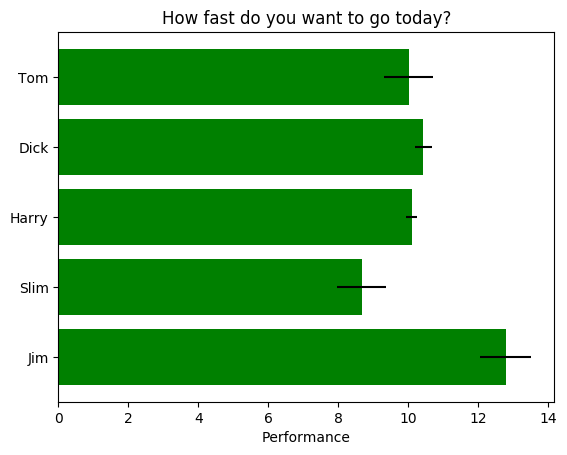

In [1]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

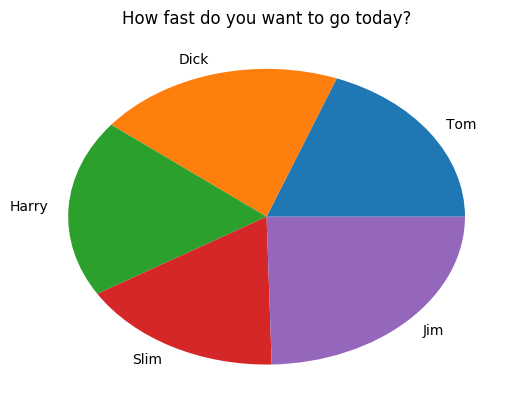

In [2]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


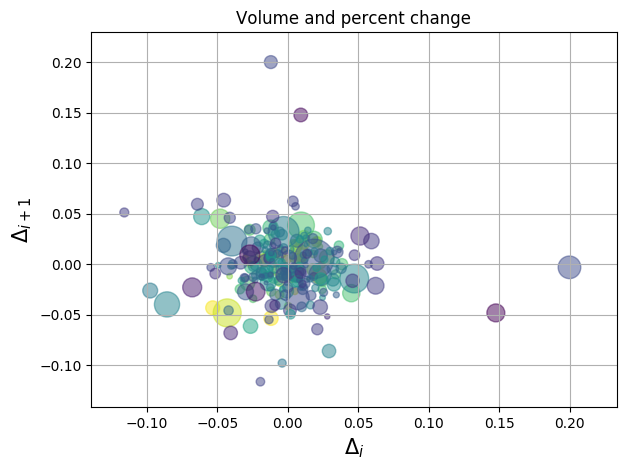

In [3]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

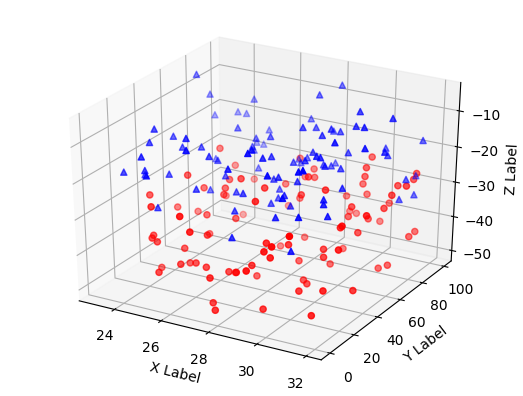

In [5]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Assignment
Plotting yesterday's dataset

In [9]:
import pandas as pd

# Unzipping file using shell command
# Files are extracted on current working directory in Colab
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip
!unzip dataset_diabetes.zip

--2018-11-07 20:23:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3347213 (3.2M) [application/zip]
Saving to: ‘dataset_diabetes.zip.1’

dataset_diabetes.zi 100%[===================>]   3.19M  1.81MB/s    in 1.8s    

2018-11-07 20:23:27 (1.81 MB/s) - ‘dataset_diabetes.zip.1’ saved [3347213/3347213]

Archive:  dataset_diabetes.zip
  inflating: dataset_diabetes/diabetic_data.csv  
  inflating: dataset_diabetes/IDs_mapping.csv  


In [0]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [10]:
# looking at files in current working directory
!ls dataset_diabetes

diabetic_data.csv  IDs_mapping.csv


In [11]:
# This dataset also has '?' character for missing values
# We'll turn these into NaNs while reading the file below
diabetes_df = pd.read_csv('dataset_diabetes/diabetic_data.csv', na_values=['?'])

diab_df = diabetes_df.copy()
diab_df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [12]:
# Getting rid of all missing values
diab_df.drop(['diag_1', 'diag_2', 'diag_3'], axis=1, inplace=True)
diab_df.medical_specialty.value_counts().head(15)
diab_df.drop(diab_df[diab_df.medical_specialty.isna()].index, inplace=True)
for column in diab_df:
    col_mode = diab_df[column].mode()[0]
    diab_df[column].fillna(col_mode, inplace=True)
    
# Checking for missing values
diab_df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [13]:
# Now we can do some plotting - all cleaned up!
diab_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),[75-100),6,25,1,1,MC,Pediatrics-Endocrinology,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
9,15738,63555939,Caucasian,Female,[90-100),[75-100),3,3,4,12,MC,InternalMedicine,33,3,18,0,0,0,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
12,40926,85504905,Caucasian,Female,[40-50),[75-100),1,3,7,7,MC,Family/GeneralPractice,60,0,15,0,1,0,8,None,None,Steady,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,<30
13,42570,77586282,Caucasian,Male,[80-90),[75-100),1,6,7,10,MC,Family/GeneralPractice,55,1,31,0,0,0,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
17,84222,108662661,Caucasian,Female,[50-60),[75-100),1,1,7,3,MC,Cardiology,29,0,11,0,0,0,3,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO


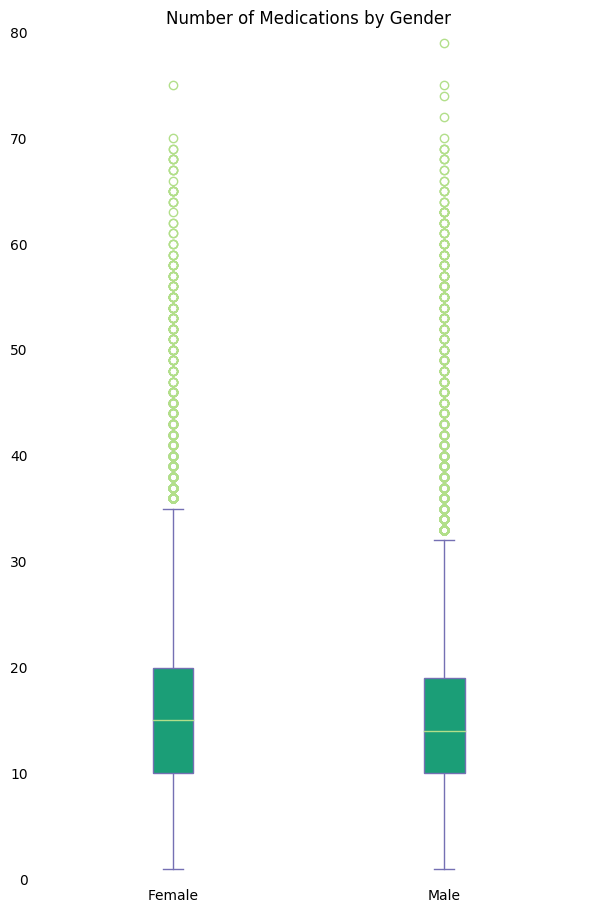

In [80]:

# Array of number of medications by gender
female_meds = diab_df.loc[diab_df['gender'] == 'Female', 'num_medications'].values
male_meds = diab_df.loc[diab_df['gender'] == 'Male', 'num_medications'].values

# Combining into one list to plot
data_to_plot = [female_meds, male_meds]

# Create a figure and axes instance
fig, ax = plt.subplots(figsize=(7,11))

# Create the boxplot and customizing color
ax.boxplot(data_to_plot, patch_artist=True,
           boxprops=dict(facecolor='#1b9e77', color='#7570b3'),
           capprops=dict(color='#7570b3'),
           whiskerprops=dict(color='#7570b3'),
           flierprops=dict(color='#e7298a', markeredgecolor='#b2df8a'),
           medianprops=dict(color='#b2df8a'))

# Hidding tickmarks
ax.tick_params(bottom="off", top="off", left="off", right="off")

# Hidding spines
for key,spine in ax.spines.items():
    spine.set_visible(False)
    
# Setting y-axis limit
ax.set_ylim(0,80)

# Labels
ax.set_xticklabels(['Female', 'Male'])
ax.set_title('Number of Medications by Gender')

plt.show()

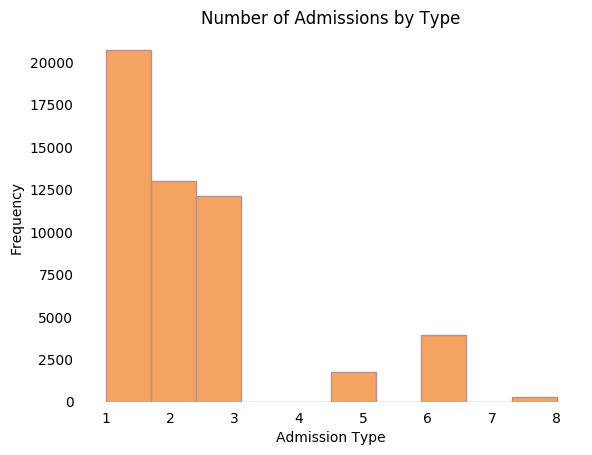

In [92]:
# Plotting histogram of admission types
fig, ax = plt.subplots()
ax.hist(diab_df['admission_type_id'], range=(1, 8), color='sandybrown', ec='rosybrown')
plt.title('Number of Admissions by Type')
ax.set_xlabel('Admission Type')
ax.set_ylabel('Frequency')
ax.tick_params(bottom="off", top="off", left="off", right="off")
for key,spine in ax.spines.items():
    spine.set_visible(False)
plt.show();


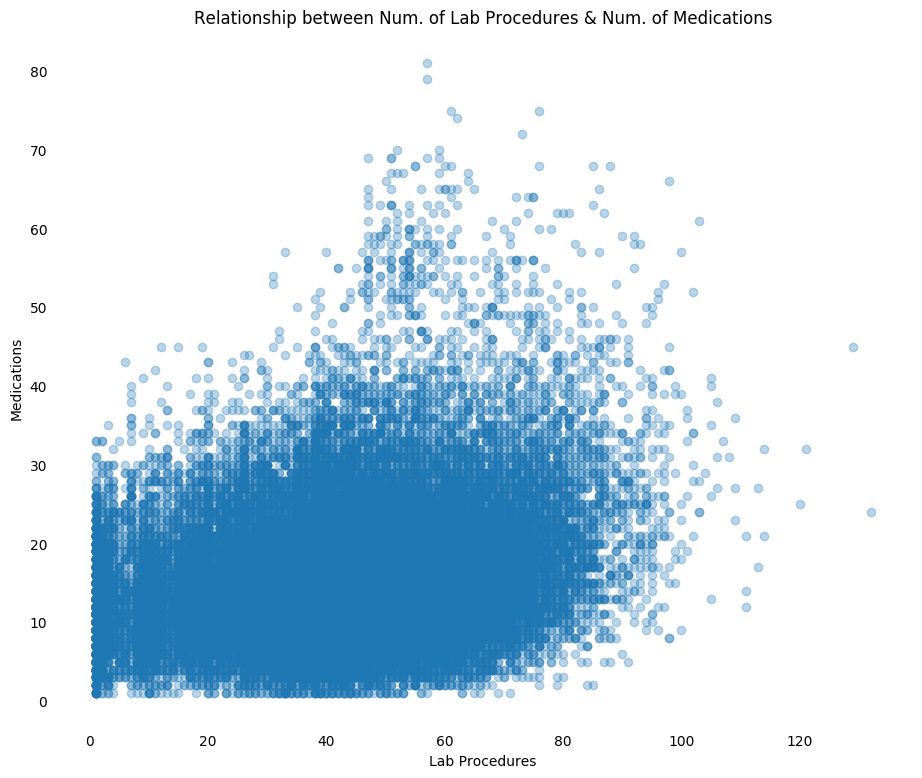

In [114]:
# Plotting scatter plot
# Relationship of number of lab procedures & number of meds
fig, ax = plt.subplots(figsize=(11,9))
ax.scatter(diab_df['num_lab_procedures'].values, diab_df['num_medications'].values, alpha=.3)
plt.title('Relationship between Num. of Lab Procedures & Num. of Medications')
ax.set_xlabel('Lab Procedures')
ax.set_ylabel('Medications')
ax.tick_params(bottom="off", top="off", left="off", right="off")
for key,spine in ax.spines.items():
    spine.set_visible(False)
plt.show();

In [54]:
diab_df['num_lab_procedures'].values.max()

81